In [1]:
# Imports and definitions
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import os
%matplotlib


Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
px = yf.download(['AAPL', 'TSLA', 'SPY', 'MSFT'], start='2021-01-01', end='2024-01-01')
px.head()

[*********************100%***********************]  4 of 4 completed


Price        Adj Close                                           Close  \
Ticker            AAPL        MSFT         SPY        TSLA        AAPL   
Date                                                                     
2021-01-04  126.544220  210.844299  348.299438  243.256668  129.410004   
2021-01-05  128.108749  211.047668  350.698273  245.036667  131.009995   
2021-01-06  123.796440  205.575363  352.794891  251.993332  126.599998   
2021-01-07  128.020798  211.425430  358.036560  272.013336  130.919998   
2021-01-08  129.125763  212.713593  360.076569  293.339996  132.050003   

Price                                                 High              ...  \
Ticker            MSFT         SPY        TSLA        AAPL        MSFT  ...   
Date                                                                    ...   
2021-01-04  217.690002  368.790009  243.256668  133.610001  223.000000  ...   
2021-01-05  217.899994  371.329987  245.036667  131.740005  218.520004  ...   
2021-01-06  212.250000  373.549988  251.993332  131.050003  216.490005  ...   
2021-01-07  218.289993  379.100006  272.013336  131.630005  219.339996  ...   
2021-01-08  219.619995  381.260010  293.339996  132.630005  220.580002  ...   

Price              Low                    Open                          \
Ticker             SPY        TSLA        AAPL        MSFT         SPY   
Date                                                                     
2021-01-04  364.820007  239.063339  133.520004  222.529999  375.309998   
2021-01-05  368.049988  239.733337  128.889999  217.259995  368.100006   
2021-01-06  369.119995  249.699997  127.720001  212.169998  369.709991   
2021-01-07  375.910004  258.399994  128.360001  214.039993  376.100006   
2021-01-08  377.100006  279.463318  132.429993  218.679993  380.589996   

Price                      Volume                                  
Ticker            TSLA       AAPL      MSFT        SPY       TSLA  
Date                                                               
2021-01-04  239.820007  143301900  37130100  110210800  145914600  
2021-01-05  241.220001   97664900  23823000   66426200   96735600  
2021-01-06  252.830002  155088000  35930700  107997700  134100000  
2021-01-07  259.209991  109578200  27694500   68766800  154496700  
2021-01-08  285.333344  105158200  22956200   71677200  225166500  

[5 rows x 24 columns]

<Axes: xlabel='Date'>

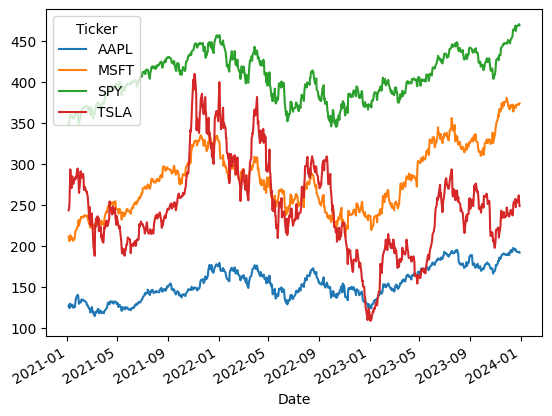

In [4]:
px['Adj Close'].plot()

In [5]:
px['Adj Close'].corr()

Ticker,AAPL,MSFT,SPY,TSLA
Ticker,,,,
AAPL,1.000000,0.873671,0.739990,0.310423
MSFT,0.873671,1.000000,0.898984,0.355374
SPY,0.739990,0.898984,1.000000,0.464138
TSLA,0.310423,0.355374,0.464138,1.000000


In [6]:
prices_df = px['Adj Close']

Check for missing Values

In [7]:
prices_df.isna().sum()

Ticker
AAPL    0
MSFT    0
SPY     0
TSLA    0
dtype: int64

Now that we have confirmed there is no missing data, we can continue with the preprocessing

### Normalize the Data

In [8]:
# Normailze use the min and max of the column
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(prices_df)

# Convert to a Data Frame
normalized_df = pd.DataFrame(normalized_data, columns= prices_df.columns, index= prices_df.index)
normalized_df.head()

Ticker,AAPL,MSFT,SPY,TSLA
Date,,,,
2021-01-04,0.151350,0.030101,0.024795,0.447731
2021-01-05,0.170157,0.031262,0.043915,0.453628
2021-01-06,0.118321,0.000000,0.060625,0.476673
2021-01-07,0.169100,0.033420,0.102404,0.542993
2021-01-08,0.182382,0.040780,0.118663,0.613642


In [9]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        # The values from the sequence length to the data point 
        X.append(data[i:i+seq_length])

        # The end Data Point, the goal is using the 50,100,1000, etc values before to predict the current
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 100
spy_data = normalized_df['SPY'].values
X, y = create_sequences(spy_data, seq_len)

In [10]:
X

array([[0.02479488, 0.04391455, 0.06062545, ..., 0.41436696, 0.40734324,
        0.41361195],
       [0.04391455, 0.06062545, 0.10240365, ..., 0.40734324, 0.41361195,
        0.41527326],
       [0.06062545, 0.10240365, 0.11866333, ..., 0.41361195, 0.41527326,
        0.42093753],
       ...,
       [0.73835325, 0.76881289, 0.75350475, ..., 0.96860098, 0.97607688,
        0.99181579],
       [0.76881289, 0.75350475, 0.73007467, ..., 0.97607688, 0.99181579,
        0.99858363],
       [0.75350475, 0.73007467, 0.73132418, ..., 0.99181579, 0.99858363,
        1.        ]])

### Data Split
Now we can split the data into Training and Testing

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (522, 100), Test shape: (131, 100)


### Save the Data
Now that we have confirmed the data to be the same length, we can save the training and testing data to the data folder

In [23]:
np.save('../data/X_train.npy', X_train)
np.save('../data/X_test.npy', X_test)
np.save('../data/y_train.npy', y_train)
np.save('../data/y_test.npy', y_test)